Tutorials & Papers:  
[Cardinality Reduction](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/)  
[FA & PCA](https://www.dummies.com/programming/big-data/data-science/data-science-using-python-to-perform-factor-and-principal-component-analysis/)  
[Factor Analysis for Decomposition](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec19/using-factor-analysis-for-decomposition)  
[SKL Decomposition](http://scikit-learn.org/stable/modules/decomposition.html)  
[Clustering Mixed Data](https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data)  
[Box Cox Transformation (Power Tranform)](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)  
[Log Transforms](http://onlinestatbook.com/2/transformations/log.html)   
[SKL ensembling](http://scikit-learn.org/stable/modules/ensemble.html)  

Kaggle Kernels & Notebooks:  
[Good Overall Kaggle Kernel](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
[Applied Regression](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)  
[Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)  

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [47]:
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [48]:
infile = './transformed_data/train_features.csv'
outfile_heuristic = './transformed_data/train_heuristic.csv'
outfile = './transformed_data/train_engineered.csv'
cat_vars = ['MSSubClass', 'MSZoning', 'Neighborhood', 'LotConfig', 'HouseStyle', 'SaleType', 'SaleCondition' ]
num_vars = ['OverallQual', 'TotalArea', 'GarageCars', 'PropertyAge', 'HasPorch', 'HasDeck', 'SalePrice']

In [49]:
df = pd.read_csv(infile)
df.head()

,OverallQual,TotalArea,GarageCars,PropertyAge,MSSubClass,MSZoning,Neighborhood,HasPorch,HasDeck,LotConfig,HouseStyle,SaleType,SaleCondition,SalePrice
0,7,4276,2,5,60,RL,1,1,0,Inside,2Story,WD,Normal,208500
1,6,3786,2,31,20,RL,2,0,1,FR2,1Story,WD,Normal,181500
2,7,4492,2,7,60,RL,1,1,0,Inside,2Story,WD,Normal,223500
3,7,4190,3,91,70,RL,3,1,0,Corner,2Story,WD,Abnorml,140000
4,8,5541,3,8,60,RL,4,1,1,FR2,2Story,WD,Normal,250000


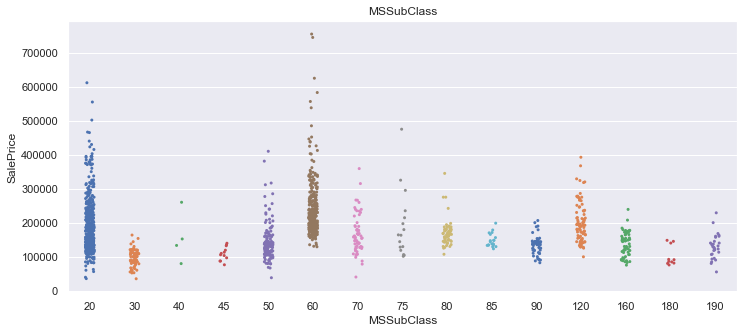

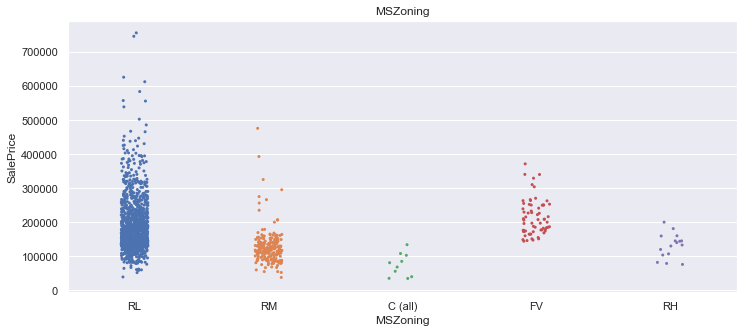

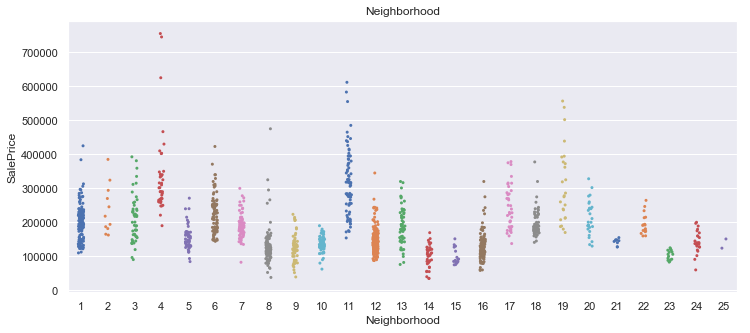

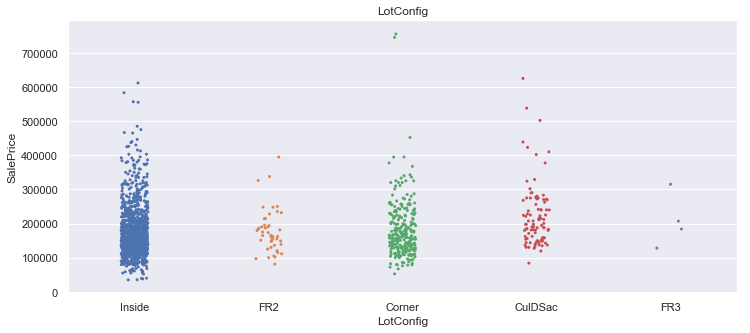

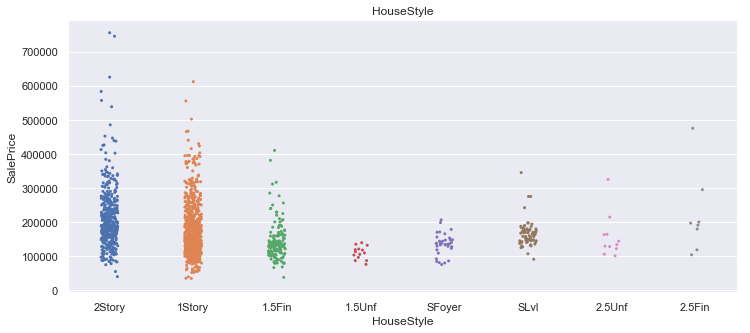

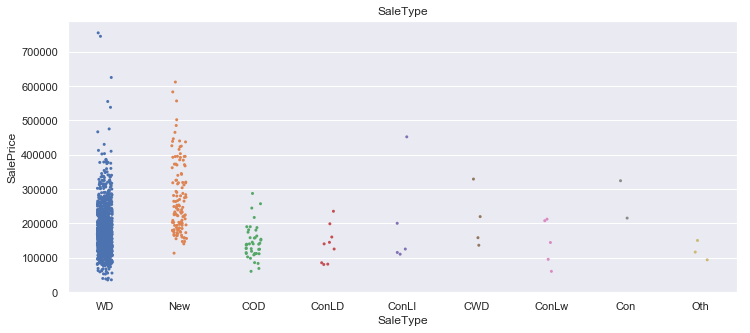

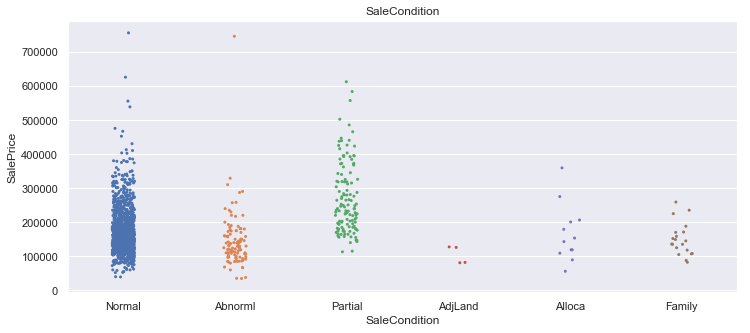

In [50]:
sns.set(font_scale=1)

for cat_var in cat_vars:
    plt.figure(figsize=(12,5))
    g = sns.stripplot(
        x=cat_var, 
        y='SalePrice', 
        data=df, 
        size=3,
        alpha=1,
        palette='deep',
        jitter=True
    )
    plt.title(cat_var)

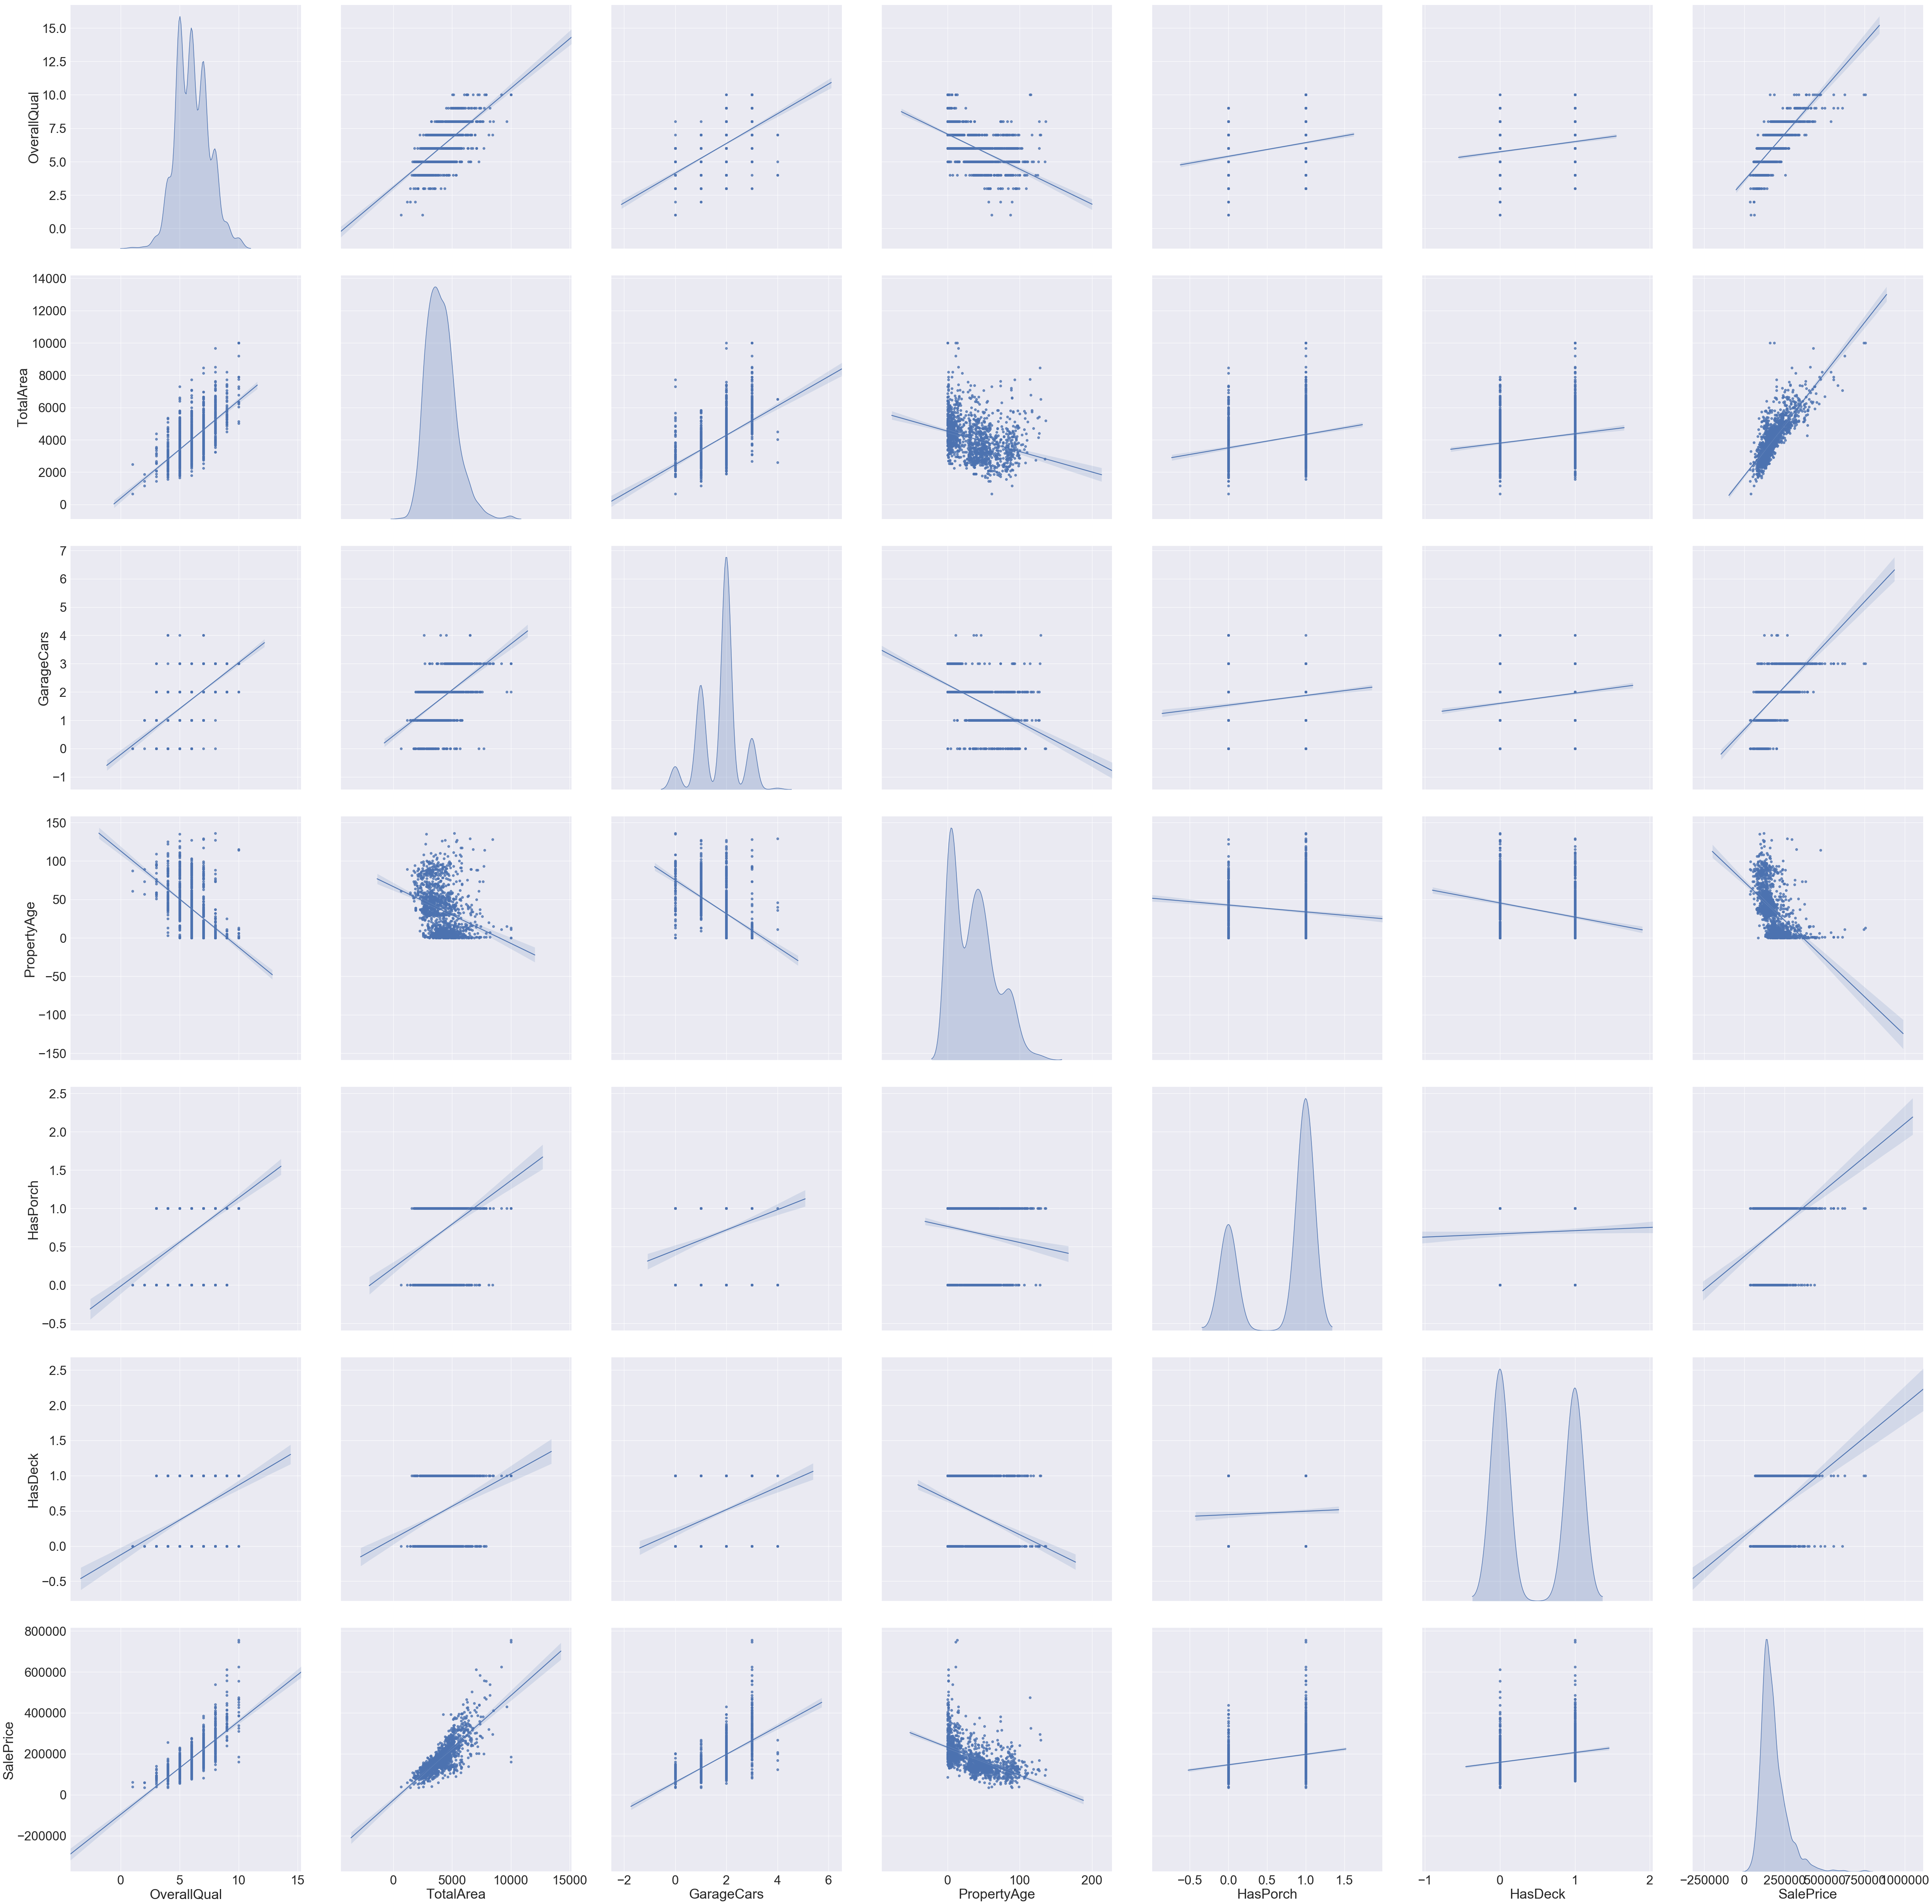

In [51]:
sns.set(font_scale=3)

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df[num_vars], 
    diag_kind='kde',
    kind="reg",
    size=10
)

In [52]:
df.to_csv(outfile_heuristic, index=False)

In [53]:
# Scaling

scaler = MinMaxScaler()

TotalArea_array = df['TotalArea'].as_matrix()
TotalArea_scaled = scaler.fit_transform(TotalArea_array.reshape(-1, 1))
df['TotalArea_scaled'] = TotalArea_scaled

PropertyAge_array = df['PropertyAge'].as_matrix()
PropertyAge_scaled = scaler.fit_transform(PropertyAge_array.reshape(-1, 1))
df['PropertyAge_scaled'] = PropertyAge_scaled

In [ ]:
# Cardinality reduction



In [54]:
# One hot encoding

one_hot_list = ['MSSubClass', 'MSZoning', 'Neighborhood', 'LotConfig', 'HouseStyle', 'SaleType', 'SaleCondition']

for var in one_hot_list:

    df_1h = pd.get_dummies(df[var])
    df_1h.columns = [
        '{}_{}'.format(var, x) for x in df_1h.columns
    ]
    df = pd.concat(
        [df, df_1h],
        axis=1
    )

In [55]:
df.to_csv(outfile, index=False)